In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import scipy

#lendo os dados basicos#
Titanic_data_raw=pd.read_csv('titanic_data.csv')
Titanic_data_raw

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Verificarei esses NaN e aonde eles aparecem.

In [2]:
#verificando dados Nan na parte aonde irei analisar
print Titanic_data_raw['Survived'].isnull().sum()
print Titanic_data_raw['Age'].isnull().sum()
print Titanic_data_raw['Sex'].isnull().sum()
print Titanic_data_raw['Pclass'].isnull().sum()
print Titanic_data_raw['Parch'].isnull().sum()

0
177
0
0
0


Infelizmente nota-se muita Muitas idades desconhecidas nos dados da idade. Por tanto terei que me lembrar disso. Alterarei agora esse mesmo dado para ter as idades divididas em maior de idade e menor

In [3]:
#redefinindo maioridade
def maioridade(idade):
    if idade>12:
        return 'Maior'
    else:
        return 'Menor'

Titanic_data_Maior_idade=Titanic_data_raw.copy()
#altero o modo de medir idade para poder identificar maior de idade e menores de idade
Titanic_data_Maior_idade['Age']=Titanic_data_Maior_idade['Age'].apply(maioridade)
Titanic_data_Maior_idade[Titanic_data_raw.isnull()] = np.NaN
Titanic_data_Maior_idade

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,Maior,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,Maior,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,Maior,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,Maior,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,Maior,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,Maior,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,Menor,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,Maior,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,Maior,1,0,237736,30.0708,NaN,C


Foi escolhido analisar os dados sobre o Titanic. A primeira alteração foi criar um Dataframe em que a idade foi substituida por um valor binário booleano que marca se é verdade se a pessoa em questão tem mais de 12 anos. Isso foi feito para se analisar diferenças entre maiores e menores de idade. 

Pelo site do Kaggle temos: Pclass a classe social(varia de primeira a terceira), a coluna SibSp significa relações de esposo(a) e irmãos no navio. Parch é o numero de parentes na forma(Pais, mães e filhos).
      A idade se terminar em 0.5 é estimada(idades menores de 1 tb são fracionarias). Embarked é o porto em q a pessoa embarcou. Os demais dados são triviais. 

Algumas perguntas iniciais a serem feitas são:

1º Mulheres e crianças realmente tiveram vantagens na chance de sobrevivência?(Mulheres e crianças primeiro) 

2º Qual relação entre poder financeiro(representada pela classe) e sobrevivência?

Como vou analisar a taxa de sobrevivência varias vezes. Criarei funcões genéricas para isso.

In [4]:
def media(Variavel_Independente):
        return (Titanic_data_Maior_idade.groupby(Variavel_Independente))['Survived'].mean()
    

In [5]:
print media('Sex')
print media('Age')
print media('Pclass')

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64
Age
Maior    0.387597
Menor    0.579710
Name: Survived, dtype: float64
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


A média de mulheres está muito maior que as de homem. O que mostra que sobreviveram mais mulheres. Já as crianças também viveram mais. Nota-se também a progressão infelizmente esperada nas classes sociais. Porém eu quero saber qual a chance de isto ter sido só um desvio estátistico. para tanto farei um teste t.

Considerarei durante o teste que meus dados são só uma amostra pois irei comparar com uma população ficticia para ver a chance de o que aconteceu ter sido puramente aleatório. Usarei o $\alpha=0.05$ como meu crivo.


In [6]:
def desvio_padrao(Variavel_Independente):
    return (Titanic_data_Maior_idade.groupby(Variavel_Independente))['Survived'].std(ddof=1)    
def Tamanho_Amostra(Variavel_Independente):    
    return (Titanic_data_Maior_idade.groupby(Variavel_Independente))['Survived'].count()


In [7]:
print desvio_padrao('Sex')
print desvio_padrao('Age')
print desvio_padrao('Pclass')

Sex
female    0.438211
male      0.391775
Name: Survived, dtype: float64
Age
Maior    0.487580
Menor    0.497222
Name: Survived, dtype: float64
Pclass
1    0.484026
2    0.500623
3    0.428949
Name: Survived, dtype: float64


Nota-se um desvio padrão maior nas mulheres. Mas a informação importante irei descobrir ao fazer o teste t.

Minha hipótese nula é de que não haverá diferença entre a sobrevivência das mulheres e a dos homens. $\mu_H=\mu_M$ que pode ser reescrita como $\mu_H-\mu_M=0$ já a hipótese alternativa é $\mu_H-\mu_M \neq 0$. Aonde os $\mu$ representam a população de homens e mulheres salvas. Usarei two-sided tail por considerar não ter motivos iniciais para ir pra nenhum dos lados.

In [8]:
#poderia ter sido usada a seguinte função simplesmente, porém seria uma outra definição da estatística t:
#scipy.stats.ttest_ind(Titanic_data_Maior_idade.groupby('Age').get_group(False)['Survived'],\
#Titanic_data_Maior_idade.groupby('Age').get_group('Maior')['Survived'], equal_var=False)
def variancia_pooled(Variavel_Independente,Alvo1,Alvo2):
    grouped_survived1=((Titanic_data_Maior_idade.groupby(Variavel_Independente))['Survived'])
    diff_media1=grouped_survived1.get_group(Alvo1)-media(Variavel_Independente)[Alvo1]
    grouped_survived2=(Titanic_data_Maior_idade.groupby(Variavel_Independente))['Survived']
    diff_media2=grouped_survived2.get_group(Alvo2)-media(Variavel_Independente)[Alvo2]    
    return ((diff_media1*diff_media1).sum()+(diff_media2*diff_media2).sum())/(Tamanho_Amostra(Variavel_Independente)[Alvo1]+Tamanho_Amostra(Variavel_Independente)[Alvo2]-2)                                                                          
                                                                               
def T_estatistica(Variavel_Independente,Alvo1,Alvo2):
    desvio_padrao_T_Raw=desvio_padrao(Variavel_Independente)
    Media_T_Raw=media(Variavel_Independente)
    variancia_corrigida=variancia_pooled(Variavel_Independente,Alvo1,Alvo2)
    Standard_Error =(variancia_corrigida/(Tamanho_Amostra(Variavel_Independente)[Alvo1])+variancia_corrigida/(Tamanho_Amostra(Variavel_Independente)[Alvo2]))**(0.5)
    Media_T = Media_T_Raw[Alvo2]-Media_T_Raw[Alvo1]
    return Media_T/Standard_Error

In [9]:
print T_estatistica('Sex','male','female'),'\n', Tamanho_Amostra('Sex'),'\n','\n'
print T_estatistica('Age','Menor','Maior'),'\n', Tamanho_Amostra('Age'),'\n','\n'
print T_estatistica('Pclass',3,1), '\n',Tamanho_Amostra('Pclass')


19.2978165501 
Sex
female    314
male      577
Name: Survived, dtype: int64 


-3.10484629196 
Age
Maior    645
Menor     69
Name: Survived, dtype: int64 


10.623796624 
Pclass
1    216
2    184
3    491
Name: Survived, dtype: int64


de posse desses dados. Caclcularei as probabilidades a partir do site: http://www.graphpad.com/quickcalcs/pValue1/

obtive para as probabilidades p:

Para o sexo menos de 0.0001.

Para a idade menos de 0.0020.

Para a classe social menos de 0.0001.

Para anular a hipótese nula precisavamos de $p<0.025$.

Portanto conseguimos anular a hipótese nula quanto ao sexo, a classe e maioridade. O que mostra que sim. ser rico tem alguma relação com sobreviver. Assim como o sexo e a maioridade.

Mas ainda estou curioso e irei testar mais 2 perguntas:

1ª Existiam mais mulheres na primeira classe?(Uma possivel explicação para os dois terem gerado maior sobrevivência)

2ª Existiam mais crianças na terceira classe?(considerando que o sexo da criança é um interesse menor na sua sobrevivência)

começarei plotando um gráfico q mostre esta relação entre sexo e classe social.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fbf9c6c50d0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7fbf9929d590>], dtype=object)

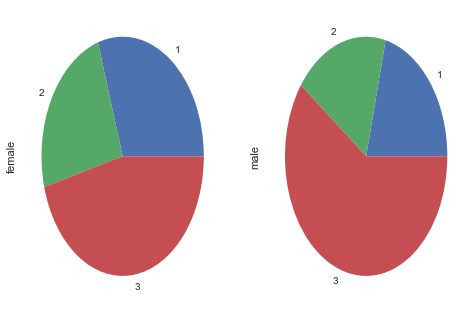

In [10]:
#Titanic_data_Maior_idade.groupby('Sex')['Pclass'].plot.pie(figsize=(6, 6))
Figura=pd.DataFrame({'female': [0,0,0],'male':[0,0,0]})
def Conta_Classe_Se_Genero(Alvo1,Alvo2):
    if(not pd.isnull(Alvo2)):
        Figura.loc[Alvo1,Alvo2]+=1
    return 0
Titanic_data_Maior_idade.apply(lambda row: Conta_Classe_Se_Genero(row['Pclass']-1,row['Sex']), axis= 1)
Figura.index+=1
Figura.plot.pie(subplots=True,legend=False)

Como nota-se no gráfico. As mulheres eram maioria na primeira classe. Logo isso pode ter ajudado elas terem sobrevivido. Porém a diferença é pouca. Antes de analisar isso irei executar o mesmo grafico para crianças. Lembrando que True significa que é maior de idade.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fbf991e1990>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7fbf99183a90>], dtype=object)

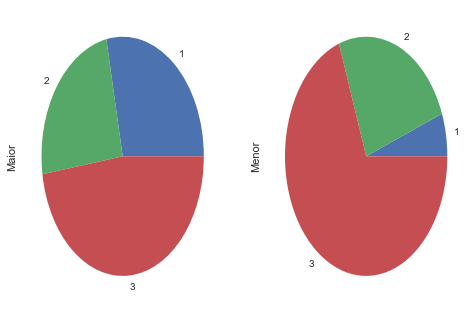

In [11]:
Figura=pd.DataFrame({'Menor': [0,0,0],'Maior':[0,0,0]})
Titanic_data_Maior_idade.apply(lambda row: Conta_Classe_Se_Genero(row['Pclass']-1,row['Age']), axis= 1)
Figura.index+=1
Figura.plot.pie(subplots=True,legend=False)


ou seja. Em nossos dados tinhamos muitas crianças na terceira classe. O que com grande possibilidade alterou nosso resultado. Irei fazer a analise por classe tanto para a idade quanto para o sexo para ver se há diferenças nos resultados.

In [12]:
print Titanic_data_Maior_idade.groupby(['Age','Pclass'])['Survived'].mean()
print Titanic_data_Maior_idade.groupby(['Sex','Pclass'])['Survived'].mean()

Age    Pclass
Maior  1         0.653846
       2         0.423077
       3         0.211726
Menor  1         0.750000
       2         1.000000
       3         0.416667
Name: Survived, dtype: float64
Sex     Pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: Survived, dtype: float64


O comportamento para o sexo é o esperado. Nota-se a grande queda da sobrevivência de mulheres da terceira classe. Mas o comportamento da idade foi muito estranho. Irei plotar o Tamanho das amostras em busca de informação.

In [13]:
print Tamanho_Amostra(['Age','Pclass'])

Age    Pclass
Maior  1         182
       2         156
       3         307
Menor  1           4
       2          17
       3          48
Name: Survived, dtype: int64


os dados das crianças de primeira e segunda classe são poucos. Uma possivel explicação para o porquê as crianças de segunda classe tiveram mais salvação do que as de primeira seja por elas terem as mães presentes e as da primeira estarem mais com as babás. Analisando os  dados Parch junto com a idade:


In [14]:
print Titanic_data_Maior_idade.groupby(['Age','Pclass','Parch'])['Survived'].mean()


Age    Pclass  Parch
Maior  1       0        0.641791
               1        0.666667
               2        0.764706
               4        0.000000
       2       0        0.357724
               1        0.619048
               2        0.700000
               3        1.000000
       3       0        0.206897
               1        0.208333
               2        0.400000
               3        0.333333
               4        0.000000
               5        0.200000
               6        0.000000
Menor  1       2        0.750000
       2       1        1.000000
               2        1.000000
       3       0        0.666667
               1        0.500000
               2        0.285714
Name: Survived, dtype: float64


Notamos que essa hipótese é inviável. As crianças da primeira e segunda classe nunca estavam sem os país. Analisando o tamanho da amostra espero ver se há dados na terceira classe para alguma análise do impacto da existência de país.

In [15]:
print Tamanho_Amostra(['Age','Pclass','Parch'])

Age    Pclass  Parch
Maior  1       0        134
               1         30
               2         17
               4          1
       2       0        123
               1         21
               2         10
               3          2
       3       0        261
               1         24
               2         10
               3          3
               4          3
               5          5
               6          1
Menor  1       2          4
       2       1         11
               2          6
       3       0          3
               1         24
               2         21
Name: Survived, dtype: int64


Infelizmente havia somente 3 crianças sem os país na terceira classe. O que me faz acreditar que seria muito difícil  por conta da baixa quantidade de dados obter informação relevante.

Será analisado os dados das mulheres portanto. Já que estes são mais abundantes. será analisado se ser mulher mas da terceira classe te torna mais ou menos capaz de sobreviver.

In [16]:
#Sessão com funções já feitas mas com generalizações que permitem comparações mais genéricas
def media_df(Df_Corrigida,Variavel_Independente):
        return (Df_Corrigida.groupby(Variavel_Independente))['Survived'].mean()
    
def desvio_padrao_df(Df_Corrigida,Variavel_Independente):
    return (Df_Corrigida.groupby(Variavel_Independente))['Survived'].std(ddof=1)    

def Tamanho_Amostra_df(Df_Corrigida,Variavel_Independente):    
    return (Df_Corrigida.groupby(Variavel_Independente))['Survived'].count()

def variancia_pooled_df(Df_Corrigida1,Df_Corrigida2,Variavel_Independente,Alvo1,Alvo2):
    try:
        grouped_survived1=((Df_Corrigida1.groupby(Variavel_Independente))['Survived'])
        diff_media1=grouped_survived1.get_group(Alvo1)-media_df(Df_Corrigida1,Variavel_Independente)[Alvo1]
        grouped_survived2=(Df_Corrigida2.groupby(Variavel_Independente))['Survived']
        diff_media2=grouped_survived2.get_group(Alvo2)-media_df(Df_Corrigida2,Variavel_Independente)[Alvo2]    
        return ((diff_media1*diff_media1).sum()+(diff_media2*diff_media2).sum())/\
(Tamanho_Amostra_df(Df_Corrigida1,Variavel_Independente)[Alvo1]+Tamanho_Amostra_df(Df_Corrigida2,Variavel_Independente)[Alvo2]-2)                                                                          
    except KeyError:
        return np.NaN

def T_estatistica_df(Df_Corrigida1,Df_Corrigida2,Variavel_Independente,Alvo1,Alvo2):
    #try por conta dos pares omissos como o ('Menor',1)
    try:
        Media_T_Raw1=media_df(Df_Corrigida1,Variavel_Independente)
        Media_T_Raw2=media_df(Df_Corrigida2,Variavel_Independente)

        variancia_corrigida=variancia_pooled_df(Df_Corrigida1,Df_Corrigida2,Variavel_Independente,Alvo1,Alvo2)
        Standard_Error =(variancia_corrigida/(Tamanho_Amostra_df(Df_Corrigida1,Variavel_Independente)[Alvo1])\
                     +variancia_corrigida/(Tamanho_Amostra_df(Df_Corrigida2,Variavel_Independente)[Alvo2]))**(0.5)
        Media_T = Media_T_Raw2[Alvo2]-Media_T_Raw1[Alvo1]
        return Media_T/Standard_Error
    except KeyError:
        return np.NaN

In [17]:
Df_Alterada_Sex1=Titanic_data_Maior_idade.copy()
Df_Alterada_Sex1['Sex']=(Titanic_data_Maior_idade['Sex'][Titanic_data_Maior_idade['Pclass']==1])
print 'Pessoas na primeira classe', '\n',(Df_Alterada_Sex1.groupby(['Sex'])['Survived']).describe(),'\n\n\n'
Df_Alterada_Sex2=Titanic_data_Maior_idade.copy()
Df_Alterada_Sex2['Sex']=(Titanic_data_Maior_idade['Sex'][Titanic_data_Maior_idade['Pclass']==2])
print 'Pessoas na Segunda classe', '\n',(Df_Alterada_Sex2.groupby(['Sex'])['Survived']).describe(),'\n\n\n'
Df_Alterada_Sex3=Titanic_data_Maior_idade.copy()
Df_Alterada_Sex3['Sex']=(Titanic_data_Maior_idade['Sex'][Titanic_data_Maior_idade['Pclass']==3])

print 'Pessoas na terceira classe', '\n',(Df_Alterada_Sex3.groupby(['Sex'])['Survived']).describe()

Pessoas na primeira classe 
        count      mean       std  min  25%  50%  75%  max
Sex                                                       
female   94.0  0.968085  0.176716  0.0  1.0  1.0  1.0  1.0
male    122.0  0.368852  0.484484  0.0  0.0  0.0  1.0  1.0 



Pessoas na Segunda classe 
        count      mean       std  min  25%  50%  75%  max
Sex                                                       
female   76.0  0.921053  0.271448  0.0  1.0  1.0  1.0  1.0
male    108.0  0.157407  0.365882  0.0  0.0  0.0  0.0  1.0 



Pessoas na terceira classe 
        count      mean       std  min  25%  50%  75%  max
Sex                                                       
female  144.0  0.500000  0.501745  0.0  0.0  0.5  1.0  1.0
male    347.0  0.135447  0.342694  0.0  0.0  0.0  0.0  1.0


Pela tabela nota-se que o comportamento foi conforme o esperado. A hipótese nula é que a população de  mulheres da terceira classe sobreviveram mais do que os homens da população geral: $\mu_{mulheres_3}=\mu_{homens_g}$

In [18]:
print T_estatistica_df(Df_Alterada_Sex1,Titanic_data_Maior_idade,['Sex'],'female','male')
print T_estatistica_df(Df_Alterada_Sex2,Titanic_data_Maior_idade,['Sex'],'female','male')
print T_estatistica_df(Df_Alterada_Sex3,Titanic_data_Maior_idade,['Sex'],'female','male')

-18.961504483
-15.7946833771
-8.02839412436


Calculo da probabilidade de se a hipótese nula pode ser anulada. Lembrando que as hipóteses e o $\alpha$ crítico permanecem inalterados($\alpha=0.05$)

$P_1<0.0001$

$P_2<0.0001$

$P_3<0.0001$

Como os $P<P_c=0.025$ para todos os casos conseguimos anular a hipótese nula para todos os casos. Mostrando novamente como as mulheres tiveram mais chances de se salvar. Mesmo se estavam na terceira classe. Foi usado o mesmo site  http://www.graphpad.com/quickcalcs/pValue1/

In [19]:
print T_estatistica_df(Df_Alterada_Sex3,Df_Alterada_Sex1,['Sex'],'female','male')

-2.15791332737


Como última análise vejo o comparativo entre mulheres da terceira clásse e homens da primeira. Esse t nos prover a seguinte probabilidade:

p=0.0318 o que infelizmente não anula a hipótese nula. Logo não podemos afirmar que mulheres da terceira classe tem correlação positiva em sobrevivência em relação aos homens da primeira.